In [1]:
import pandas as pd

In [2]:
path = 'C:\\Users\\marim\\Desktop\\summer 2024 projects\\internship 2024\\data\\'

df_correct = pd.read_csv(path + "correct_Voltage.csv") # read from csv FileExistsError
df_brokenV11 = pd.read_csv(path + "BrokenV11_Voltage.csv") # read from csv FileExistsError
df_brokenH11 = pd.read_csv(path + "BrokenH11_Voltage.csv") # read from csv FileExistsError

In [3]:
df_correct

,node,voltage
0,N00,10.000000
1,N01,7.307694
2,N02,5.769233
3,N03,5.000003
4,N10,7.307694
5,N11,6.153848
6,N12,5.000003
7,N13,4.230772
8,N20,5.769233
9,N21,5.000003


In [4]:
df_brokenV11

,node,voltage
0,N00,10.000000
1,N01,7.100398
2,N02,5.627480
3,N03,4.900928
4,N10,7.258918
5,N11,5.673715
6,N12,4.881113
7,N13,4.174376
8,N20,6.103040
9,N21,5.673713


In [5]:
df_brokenH11

,node,voltage
0,N00,10.000000
1,N01,7.258918
2,N02,6.103040
3,N03,5.376488
4,N10,7.100398
5,N11,5.673715
6,N12,5.673713
7,N13,4.649936
8,N20,5.627480
9,N21,4.881113


In [6]:
V11 = df_brokenV11['voltage']
H11 = df_brokenH11['voltage']

In [7]:
df = df_correct
df['broken V11'] = V11
df['broken H11'] = H11
df['letters'] = ''
df

,node,voltage,broken V11,broken H11,letters
0,N00,10.000000,10.000000,10.000000,
1,N01,7.307694,7.100398,7.258918,
2,N02,5.769233,5.627480,6.103040,
3,N03,5.000003,4.900928,5.376488,
4,N10,7.307694,7.258918,7.100398,
5,N11,6.153848,5.673715,5.673715,
6,N12,5.000003,4.881113,5.673713,
7,N13,4.230772,4.174376,4.649936,
8,N20,5.769233,6.103040,5.627480,
9,N21,5.000003,5.673713,4.881113,


In [33]:
n = 4
A = 65
def node_name(i, j):
    return f'N{i}{j}'

df['letters'] = ''

def adding_letters(column, ch, i, j):
    for ind in df.index:
        if(df[column][ind] == f'N{i}{j}'):
            c = df['letters'][ind]
            df.loc[ind, 'letters'] = c + ch

def giving_loc(i, j):
    adding_letters('node', ch, i, j)
    
reverse = 0
for c in range(ord('A'), ord('A') + 4 * (n-1)):
    ch = chr(c)
    # print(ch, c - A)
    c = c - A
    # A B C
    # D E F
    # G H I
    # J K L
    '''
    Lets have 4 groups of letters
    '''
    if(int(c/3) == 0):
        giving_loc(0, c)
        # print(0, c)
    if(int(c/3) == 1):
        giving_loc(c - n + 1, 3)
        # print(c - n + 1, 3)
    if(int(c/3) == 2):
        giving_loc(3, c - n + 1 + reverse)
        # print(3, c - n + 1 + reverse)
        reverse -= 2
        # print(reverse)
    if(int(c/3) == 3):
        giving_loc(c + reverse, 0)
        # print(c + reverse, 0, c)
        reverse -= 2
        # print(reverse)
adding_letters('node', '1', 1, 1)
adding_letters('node', '2', 1, 2)
adding_letters('node', '3', 2, 1)
adding_letters('node', '4', 2, 2)
df

,node,voltage,broken V11,broken H11,letters,V11,H11
9,N21,5.000003,5.673713,4.881113,3,6.737105e-01,-1.188899e-01
13,N31,4.230772,4.649936,4.174376,I,4.191638e-01,-5.639642e-02
12,N30,5.000003,5.376488,4.900928,J,3.764853e-01,-9.907492e-02
8,N20,5.769233,6.103040,5.627480,K,3.338068e-01,-1.417534e-01
14,N32,2.692312,2.899607,2.741087,H,2.072957e-01,4.877560e-02
10,N22,3.846157,4.048880,4.048880,4,2.027230e-01,2.027230e-01
11,N23,2.692312,2.741087,2.899607,F,4.877560e-02,2.072957e-01
15,N33,0.000005,0.000006,0.000006,G,2.560708e-07,2.560708e-07
0,N00,10.000000,10.000000,10.000000,A,0.000000e+00,0.000000e+00
4,N10,7.307694,7.258918,7.100398,L,-4.877534e-02,-2.072954e-01


In [34]:
# for ind in df.index:
#     if(len(df['letters'][ind]) == 0):
#         df = df.drop([ind]);
# df

In [35]:
df = df.sort_values(by='voltage', ascending=False, axis=0)
df

,node,voltage,broken V11,broken H11,letters,V11,H11
0,N00,10.000000,10.000000,10.000000,A,0.000000e+00,0.000000e+00
4,N10,7.307694,7.258918,7.100398,L,-4.877534e-02,-2.072954e-01
1,N01,7.307694,7.100398,7.258918,B,-2.072954e-01,-4.877534e-02
5,N11,6.153848,5.673715,5.673715,1,-4.801328e-01,-4.801328e-01
8,N20,5.769233,6.103040,5.627480,K,3.338068e-01,-1.417534e-01
2,N02,5.769233,5.627480,6.103040,C,-1.417534e-01,3.338068e-01
9,N21,5.000003,5.673713,4.881113,3,6.737105e-01,-1.188899e-01
6,N12,5.000003,4.881113,5.673713,2,-1.188899e-01,6.737105e-01
12,N30,5.000003,5.376488,4.900928,J,3.764853e-01,-9.907492e-02
3,N03,5.000003,4.900928,5.376488,D,-9.907492e-02,3.764853e-01


Text(0.5, 0.98, 'Categorical Plotting')

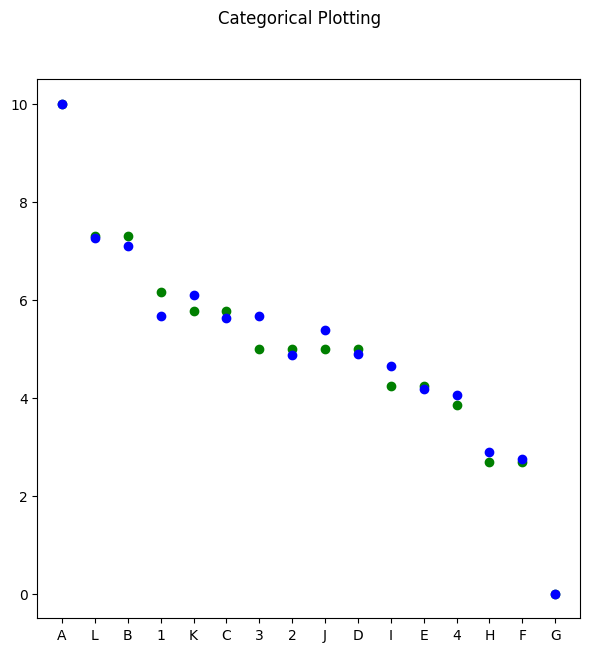

In [36]:
import matplotlib.pyplot as plt

# df = df1
names = df['letters']
correct = df['voltage']
broken_V11 = df['broken V11']
broken_H11 = df['broken H11']

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(names, correct, color = "green")
ax.scatter(names, broken_V11, color = 'blue')
# ax.scatter(names, broken_H11, color = 'red')
fig.suptitle('Categorical Plotting')

In [37]:
df['V11'] = (df['broken V11'] - df['voltage'])
df['H11'] = (df['broken H11'] - df['voltage'])
df

,node,voltage,broken V11,broken H11,letters,V11,H11
0,N00,10.000000,10.000000,10.000000,A,0.000000e+00,0.000000e+00
4,N10,7.307694,7.258918,7.100398,L,-4.877534e-02,-2.072954e-01
1,N01,7.307694,7.100398,7.258918,B,-2.072954e-01,-4.877534e-02
5,N11,6.153848,5.673715,5.673715,1,-4.801328e-01,-4.801328e-01
8,N20,5.769233,6.103040,5.627480,K,3.338068e-01,-1.417534e-01
2,N02,5.769233,5.627480,6.103040,C,-1.417534e-01,3.338068e-01
9,N21,5.000003,5.673713,4.881113,3,6.737105e-01,-1.188899e-01
6,N12,5.000003,4.881113,5.673713,2,-1.188899e-01,6.737105e-01
12,N30,5.000003,5.376488,4.900928,J,3.764853e-01,-9.907492e-02
3,N03,5.000003,4.900928,5.376488,D,-9.907492e-02,3.764853e-01


In [41]:
df = df.sort_values(by='H11', ascending=False, axis=0)
df

,node,voltage,broken V11,broken H11,letters,V11,H11
6,N12,5.000003,4.881113,5.673713,2,-1.188899e-01,6.737105e-01
7,N13,4.230772,4.174376,4.649936,E,-5.639642e-02,4.191638e-01
3,N03,5.000003,4.900928,5.376488,D,-9.907492e-02,3.764853e-01
2,N02,5.769233,5.627480,6.103040,C,-1.417534e-01,3.338068e-01
11,N23,2.692312,2.741087,2.899607,F,4.877560e-02,2.072957e-01
10,N22,3.846157,4.048880,4.048880,4,2.027230e-01,2.027230e-01
14,N32,2.692312,2.899607,2.741087,H,2.072957e-01,4.877560e-02
15,N33,0.000005,0.000006,0.000006,G,2.560708e-07,2.560708e-07
0,N00,10.000000,10.000000,10.000000,A,0.000000e+00,0.000000e+00
1,N01,7.307694,7.100398,7.258918,B,-2.072954e-01,-4.877534e-02
